# Proving Paige Wrong

#### A computational essay by Maya Wallach and Elias Taira, undergrads in Michigan State University's PHY415 class

## Introduction

### Villian Origin Story

*Insert text here*

### Approach

*Insert text here*

## Computation

Below we import required libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, irfft
from scipy.io import wavfile
from scipy import signal
%matplotlib inline

### Wave Cleaning

Here is the function that we will use to clean the signals:

In [90]:
def gather_data(samplerate,data):
    N = data.shape[0]
    length = N / samplerate
    T0 = length
    dt = T0/N
    time = np.linspace(0., length, data.shape[0])

    return N, length, T0, dt, time   
def cleaning(samplerate,data,freqCutoff):
    # Make time array/get time data
    N, length, T0, dt, time = gather_data(samplerate, data)
    
    # Clean the signal
    Vdusty = (2/N)*fft(data[:, 1])
    freq = fftfreq(N,dt)
    VCleanf = Vdusty.copy()

    for i in range(len(freq)):
        if abs(freq[i]) > freqCutoff:
            VCleanf[i] = 0       

    VClean = ifft(N*VCleanf)
    VC = np.real(VClean)
    return time,VClean,freq

<ipython-input-109-56f442347ab9>:2: WavFileWarning: Reached EOF prematurely; finished at 16772276 bytes, expected 16772284 bytes from header.
  hw_sr, hw_dat = wavfile.read('songs/holy-wars-intro.wav')
<ipython-input-109-56f442347ab9>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  ps_sr, ps_dat = wavfile.read('songs/peace-sells-intro.wav')


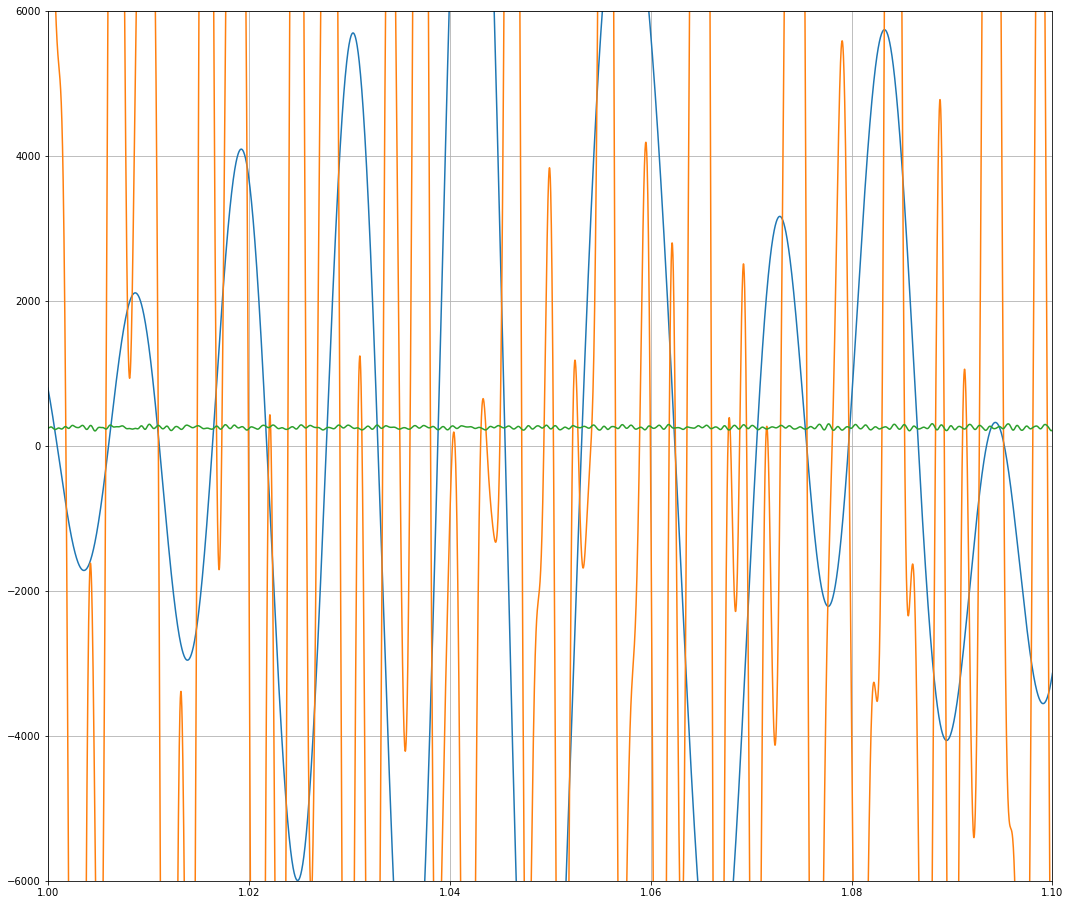

In [109]:
# Overlaying signals from the intro for Peace Sells and Holy Wars
hw_sr, hw_dat = wavfile.read('songs/holy-wars-intro.wav')
ps_sr, ps_dat = wavfile.read('songs/peace-sells-intro.wav')
cat_sr, cat_dat = wavfile.read('songs/greatest-song-ever-intro.wav')

ps_N, ps_length, ps_T0, ps_dt, ps_time = gather_data(ps_sr, ps_dat)
hw_N, hw_length, ps_T0, hw_dt, hw_time = gather_data(hw_sr, hw_dat)
cat_N, cat_length, cat_T0, cat_dt, cat_time = gather_data(cat_sr, cat_dat)

ps_cutoff = 100
hw_cutoff = 600
cat_cutoff = 2000

ps_time, ps_intro, ps_freq = cleaning(ps_sr, ps_dat, ps_cutoff)
hw_time, hw_intro, hw_freq = cleaning(hw_sr, hw_dat, hw_cutoff)
cat_time, cat_intro, cat_freq = cleaning(cat_sr, cat_dat, cat_cutoff)

ps_cleaned_fft = (2/ps_N)*fft(ps_intro)
ps_freq = fftfreq(ps_N, ps_dt)

hw_cleaned_fft = (2/hw_N)*fft(hw_intro)
hw_freq = fftfreq(hw_N, hw_dt)

cat_cleaned_fft = (2/hw_N)*fft(cat_intro)
cat_freq = fftfreq(cat_N, cat_dt)

plt.figure(figsize=(18,16))
plt.plot(ps_time, np.real(ps_intro))
plt.plot(hw_time, np.real(hw_intro))
plt.plot(cat_time, np.real(cat_intro))
plt.axis([1,1.1,-6000,6000])
plt.grid()

(0.0, 150.0, 0.0, 400.0)

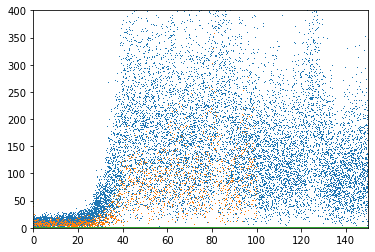

In [110]:
plt.plot(hw_freq[0:hw_N//2], np.abs(hw_cleaned_fft[0:hw_N//2]), marker = ",", linestyle="")
plt.plot(ps_freq[0:ps_N//2], np.abs(ps_cleaned_fft[0:ps_N//2]), marker = ",", linestyle="")
plt.plot(ps_freq[0:cat_N//2], np.abs(cat_cleaned_fft[0:cat_N//2]), marker = ",", linestyle="")

plt.axis([0,150,0,400])

Correlation between signals

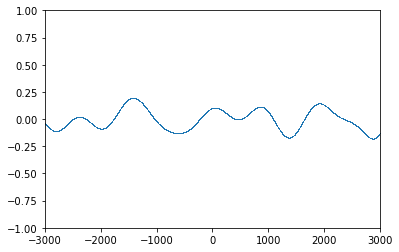

In [123]:
sig1 = np.real(hw_intro)
sig2 = np.real(ps_intro)
ps_hw_corr = signal.correlate(sig1, sig2, method='fft')
ps_hw_corr /= np.max(ps_hw_corr)
lags = np.linspace(-len(sig1), len(sig1), len(ps_hw_corr))
plt.axis([-3000,3000,-1,1])
plt.plot(lags,ps_hw_corr,marker=',', linestyle="")

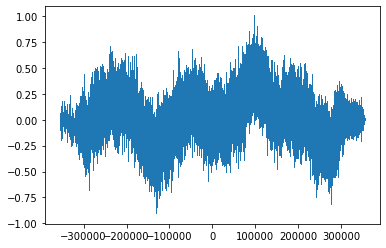

In [119]:
sig1 = np.real(cat_intro)
sig2 = np.real(hw_intro)
cat_hw_corr = signal.correlate(sig1, sig2, method='fft')
cat_hw_corr/= np.max(cat_hw_corr)
lags = np.linspace(-len(sig1), len(sig1), len(cat_hw_corr))
plt.plot(lags,cat_hw_corr,marker=',', linestyle="")

In [126]:
print('Amount of times the cross correlation of Peace Sells and Holy Wars equals 1:',len(np.where(ps_hw_corr>=max(ps_hw_corr))[0]))
print('Amount of times the cross correlation of A Cruel Angels Thesis and Holy Wars equals 1:',len(np.where(cat_hw_corr>=max(cat_hw_corr))[0]))

Amount of times the cross correlation of Peace Sells and Holy Wars equals 1: 1
Amount of times the cross correlation of A Cruel Angels Thesis and Holy Wars equals 1: 1


Convolution Integral

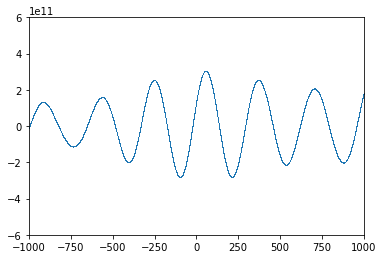

In [33]:
autocorr = signal.fftconvolve(sig1, sig2,mode="full")
lags = np.linspace(-len(sig1), len(sig1), len(corr1))
plt.axis([-1000,1000,-6e11,6e11])
plt.plot(lags,autocorr,marker=',', linestyle="")

In [35]:
np.where(autocorr==min(autocorr))

(array([2246580], dtype=int64),)